In [188]:
from datetime import datetime
import nltk

In [189]:
!pip install jupyter-summarytools

In [190]:
# from google.colab import files
# uploaded = files.upload()
# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [191]:
import pandas as pd

df = pd.read_csv("mobil_listrik.csv")

In [192]:
df.shape

(1517, 5)

In [193]:
df.head()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
0,Ugzbll5eyrIy3-gdUUJ4AaABAg,Sqn Ldr,2023-08-06 12:54:49+00:00,saran sih bikin harga ionic sama kayak brio ...,positif
1,UgzEDUiV3OTrV943p8p4AaABAg,lushen ace,2023-08-04 12:16:23+00:00,problem subsidi kualitas diturunin harga dinai...,negatif
2,UgwqJqu6JMF4EH2CsVV4AaABAg,Fatih Al-Ayyubi,2023-08-04 10:17:57+00:00,baik kualitas kembang dulu baik kualitas motor...,positif
3,UgyYicCMR1rKwuOj2Y14AaABAg,yp office,2023-08-04 08:29:54+00:00,model jelek kwalitas buruk harga mahal croot,negatif
4,UgxKAcLuAwZOQK6es-x4AaABAg,Lembur Kuring,2023-08-04 07:55:37+00:00,syarat ngaco woy anak muda blom punya ruma...,negatif


In [194]:
df.tail()

,id_komentar,nama_akun,tanggal,text_cleaning,sentimen
1512,UgxJPeJSdLI9a7L_adx4AaABAg,Fish aquspace,2022-09-19 12:30:44+00:00,apa kabar padahal negri luar biasa dapat negara,negatif
1513,UgyHzUNyXtjxftnySNF4AaABAg,Elias Panai,2022-09-19 12:27:18+00:00,antar anak sekolah antar bantu pasar klw jau...,negatif
1514,UgxbIAGGO6Jt50q6wT94AaABAg,Mikhanalont Horassss,2022-09-19 12:23:06+00:00,esemka bangga solo,positif
1515,UgyRNiIV6k2t21V4iMN4AaABAg,ANI ANI SOFIE,2022-09-19 11:48:39+00:00,cerdas orang hny dn pasar itu jln x blom d...,netral
1516,UgyUFUCTdK_RJFsYwQV4AaABAg,La Bold,2022-09-19 11:41:32+00:00,niat beli ev murah malah ikut dinaikin sama pe...,negatif


In [195]:
from summarytools import dfSummary
dfSummary(df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,id_komentar[object],1. Ugzbll5eyrIy3-gdUUJ4AaABAg2. UgwGxMNpYqsTECwQNq54AaABAg3. UgyZyp1ppBPMPOVonEJ4AaABAg4. Ugy7ZnM7TsKE9aSyBmt4AaABAg5. UgxsshiUsib4wn-XFRF4AaABAg6. UgxOi-W-pmgxu_DLIZB4AaABAg7. UgzKW5nJx0TkHPNhte14AaABAg8. UgzCgTW5kPMxv4BEip94AaABAg9. UgyV5-w9ba4Wf0_VDax4AaABAg10. UgxiQIdNqGgtCN8Ps614AaABAg11. other,"1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1,507 (99.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADQklEQVR4nO3cwWkbYRRG0TdCJPZGQghUQtKDisg2HauINGGkReJ44yyCS8gdmJxTwb+48BDMp+X9/X2gsFv7Afw/xEZGbGTERkZsZMRGRmxkxEZGbGTERma3LMvXZVme1n4I27ebmS8z83nth7B9zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdnNzI+Z+b32Q9i+xb8YUXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhklIzYyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhkls8zM88x8WvshbN7b/nw+fzscDqe1X8K2PR6Pl/3hcDhdr9dfx+Pxde0HsU33+/3pdrud9jMzx+Px9XK5/Fz7UWzasx8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPYzfz8BWfshbNdHX8v5fP7u40n+tcfj8eKzcCpv1lVk/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiPzB0WpV2yec8bJAAAAAElFTkSuQmCC"">",0(0.0%)
2,nama_akun[object],1. Albert2. Sqn Ldr3. Jony Susanto4. Razkaman5. Aris Dar6. Muliawan Chandra7. ARISWANDI8. Feri Frij9. Ainun Nihaya10. Farlin Official11. other,"2 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1,506 (99.3%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAAADQklEQVR4nO3cwWkbYRRG0TdCJPZGQghUQtKDisg2HauINGGkReJ44yyCS8gdmJxTwb+48BDMp+X9/X2gsFv7Afw/xEZGbGTERkZsZMRGRmxkxEZGbGTERma3LMvXZVme1n4I27ebmS8z83nth7B9zigZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkdnNzI+Z+b32Q9i+xb8YUXFGyYiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZgxcyBi9knFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyIiNjHUVGesqMs4oGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNj8ELG4IWMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRERsZ6yoy1lVknFEyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsbghYzBCxlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhklIzYyYiNjXUXGuoqMM0pGbGTERkZsZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERsa6iox1FRlnlIzYyBi8kDF4IeOMkhEbGbGRERsZsZERGxmxkREbGbGRERsZsZERGxmxkREbGbGRMXghY/BCxhkls8zM88x8WvshbN7b/nw+fzscDqe1X8K2PR6Pl/3hcDhdr9dfx+Pxde0HsU33+/3pdrud9jMzx+Px9XK5/Fz7UWzasx8IZMRGRmxkxEZGbGTERkZsZMRGRmxkxEZGbGTERkZsZPYzfz8BWfshbNdHX8v5fP7u40n+tcfj8eKzcCpv1lVk/EAgIzYyYiMjNjJiIyM2MmIjIzYyYiPzB0WpV2yec8bJAAAAAElFTkSuQmCC"">",1(0.1%)
3,tanggal[object],1. 2023-06-06 14:02:09+00:002. 2023-06-06 15:19:27+00:003. 2023-06-06 14:38:52+00:004. 2023-06-07 01:53:14+00:005. 2023-06-07 01:35:37+00:006. 2023-06-07 01:37:40+00:007. 2023-06-07 01:39:50+00:008. 2023-06-07 01:40:54+00:009. 2023-06-07 01:41:04+00:0010. 2023-06-07 01:51:32+00:0011. other,"2 (0.1%)2 (0.1%)2 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1 (0.1%)1,504 (99.1%)","<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAJsAAAD+CAYAAAAtWHdlAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaH

In [196]:
df.drop_duplicates(inplace = True)

In [197]:
import pandas as pd

data = df[['tanggal', 'text_cleaning', 'sentimen']]
data['tanggal'] = pd.to_datetime(data['tanggal']).dt.date
data.set_index('tanggal', inplace=True)
data.head()

C:\Users\untu0\AppData\Local\Temp\ipykernel_29256\1683775021.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,text_cleaning,sentimen
tanggal,,
2023-08-06,saran sih bikin harga ionic sama kayak brio ...,positif
2023-08-04,problem subsidi kualitas diturunin harga dinai...,negatif
2023-08-04,baik kualitas kembang dulu baik kualitas motor...,positif
2023-08-04,model jelek kwalitas buruk harga mahal croot,negatif
2023-08-04,syarat ngaco woy anak muda blom punya ruma...,negatif


In [198]:
data.dropna(inplace = True)

C:\Users\untu0\AppData\Local\Temp\ipykernel_29256\339833404.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [199]:
data.isna().sum()

text_cleaning    0
sentimen         0
dtype: int64

In [200]:
import plotly.express as px
import matplotlib.pyplot as plt
sentimen_counts = data['sentimen'].value_counts()
fig = px.bar(y= sentimen_counts.values, x=sentimen_counts.index, title='Sentimen')
fig.show()

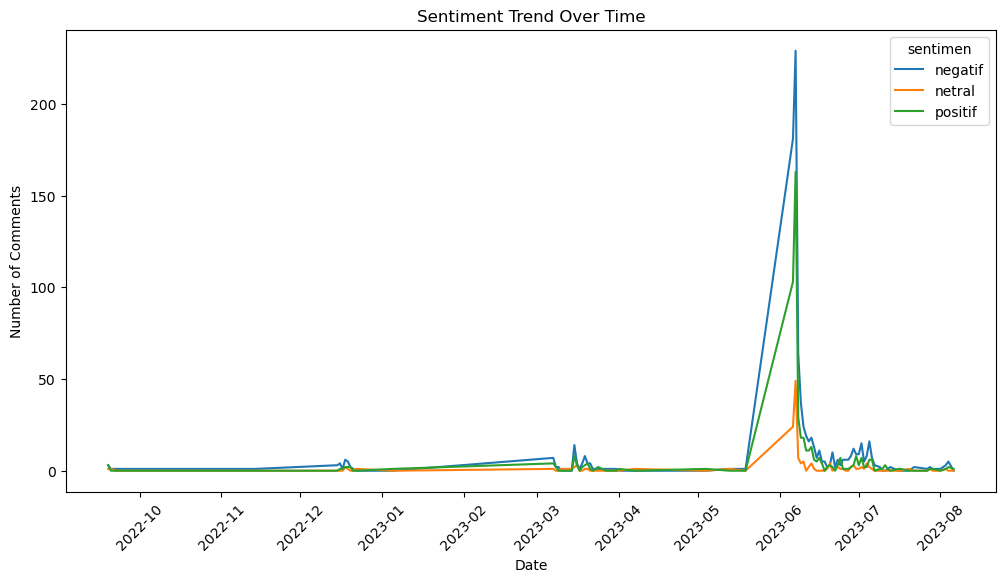

In [201]:
df['tanggal'] = pd.to_datetime(df['tanggal'])

sentiment_over_time = df.groupby([df['tanggal'].dt.date, 'sentimen']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sentiment_over_time.plot(kind='line', ax=plt.gca())
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()

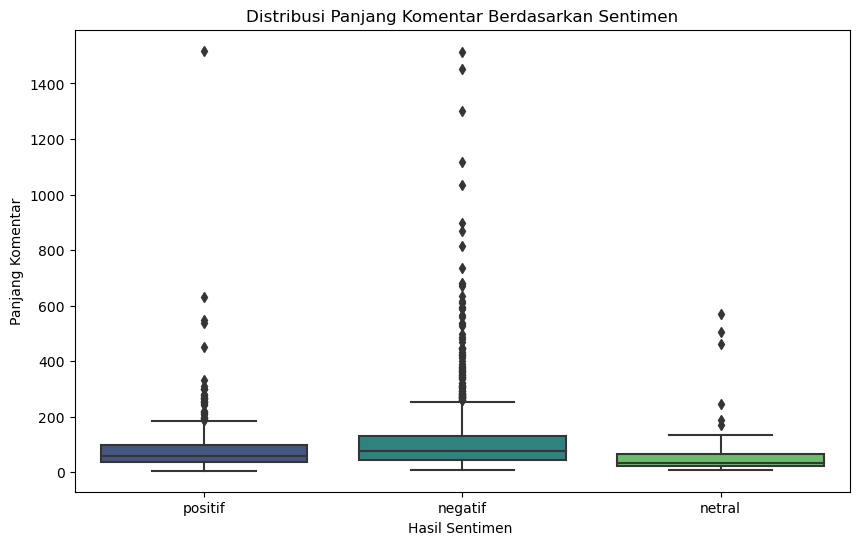

          count        mean         std  min   25%   50%     75%     max
sentimen                                                                
negatif   869.0  117.637514  147.689279  9.0  42.0  75.0  129.00  1513.0
netral    142.0   56.584507   76.900621  6.0  21.0  34.5   66.75   570.0
positif   504.0   80.603175   95.883530  5.0  35.0  57.0   96.00  1518.0


In [202]:
import seaborn as sns
df['comment_length'] = df['text_cleaning'].str.len()


plt.figure(figsize=(10, 6))
sns.boxplot(x='sentimen', y='comment_length', data=df, palette='viridis')
plt.title('Distribusi Panjang Komentar Berdasarkan Sentimen')
plt.xlabel('Hasil Sentimen ')
plt.ylabel('Panjang Komentar')
plt.show()


comment_length_stats = df.groupby('sentimen')['comment_length'].describe()
print(comment_length_stats)

c:\Users\untu0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

c:\Users\untu0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\untu0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

c:\Users\untu0\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silen

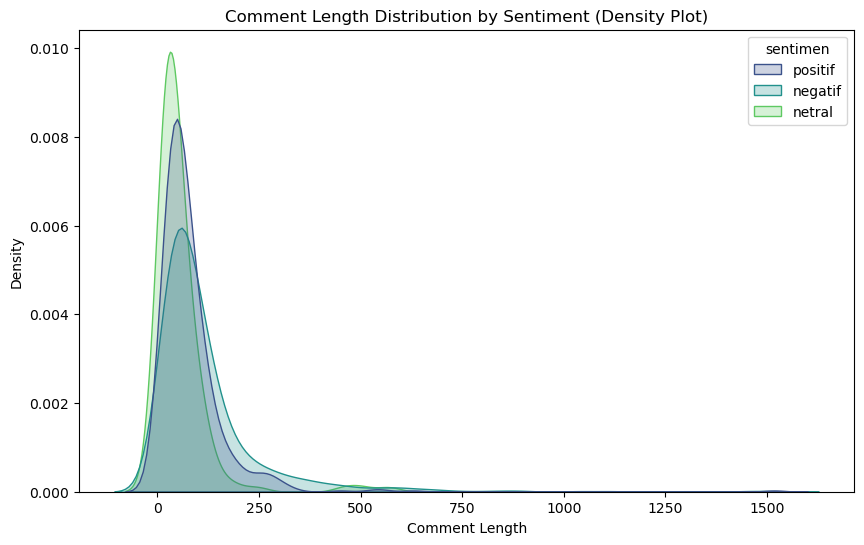

In [203]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='comment_length', hue='sentimen', fill=True, common_norm=False, palette='viridis')
plt.title('Comment Length Distribution by Sentiment (Density Plot)')
plt.xlabel('Comment Length')
plt.ylabel('Density')
plt.show()

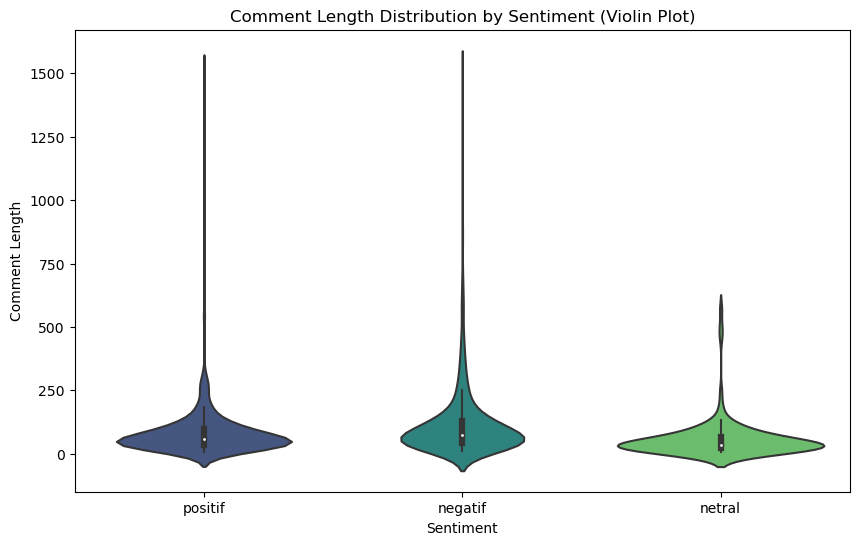

In [204]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='sentimen', y='comment_length', data=df, palette='viridis')
plt.title('Comment Length Distribution by Sentiment (Violin Plot)')
plt.xlabel('Sentiment')
plt.ylabel('Comment Length')
plt.show()

In [205]:
df_groupby = pd.get_dummies(data, columns = ['sentimen'], dtype = int)
df_groupby.reset_index(inplace = True)
df_groupby.head()

,tanggal,text_cleaning,sentimen_negatif,sentimen_netral,sentimen_positif
0,2023-08-06,saran sih bikin harga ionic sama kayak brio ...,0,0,1
1,2023-08-04,problem subsidi kualitas diturunin harga dinai...,1,0,0
2,2023-08-04,baik kualitas kembang dulu baik kualitas motor...,0,0,1
3,2023-08-04,model jelek kwalitas buruk harga mahal croot,1,0,0
4,2023-08-04,syarat ngaco woy anak muda blom punya ruma...,1,0,0


In [206]:
df_groupby['tanggal'] = pd.to_datetime(df_groupby['tanggal']).dt.date
df_groupby.set_index('tanggal', inplace=True)

df_groupby.head()

,text_cleaning,sentimen_negatif,sentimen_netral,sentimen_positif
tanggal,,,,
2023-08-06,saran sih bikin harga ionic sama kayak brio ...,0,0,1
2023-08-04,problem subsidi kualitas diturunin harga dinai...,1,0,0
2023-08-04,baik kualitas kembang dulu baik kualitas motor...,0,0,1
2023-08-04,model jelek kwalitas buruk harga mahal croot,1,0,0
2023-08-04,syarat ngaco woy anak muda blom punya ruma...,1,0,0


In [207]:
df_groupby.index = pd.to_datetime(df_groupby.index)

df_groupby_month = df_groupby.groupby(pd.Grouper(freq='M')).sum()

C:\Users\untu0\AppData\Local\Temp\ipykernel_29256\1850269323.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [208]:
df_groupby_month.head()

,text_cleaning,sentimen_negatif,sentimen_netral,sentimen_positif
tanggal,,,,
2022-09-30,ingat kerja sama sama musk pertama ketemu ...,5,2,3
2022-10-31,0,0,0,0
2022-11-30,program konversi motor baru libat bumn pasti m...,1,0,0
2022-12-31,hybrid pajak tahun ringan plat khusus kena gan...,22,4,8
2023-01-31,mikir begini mbok kolaborasi usaha indonesia b...,0,0,1


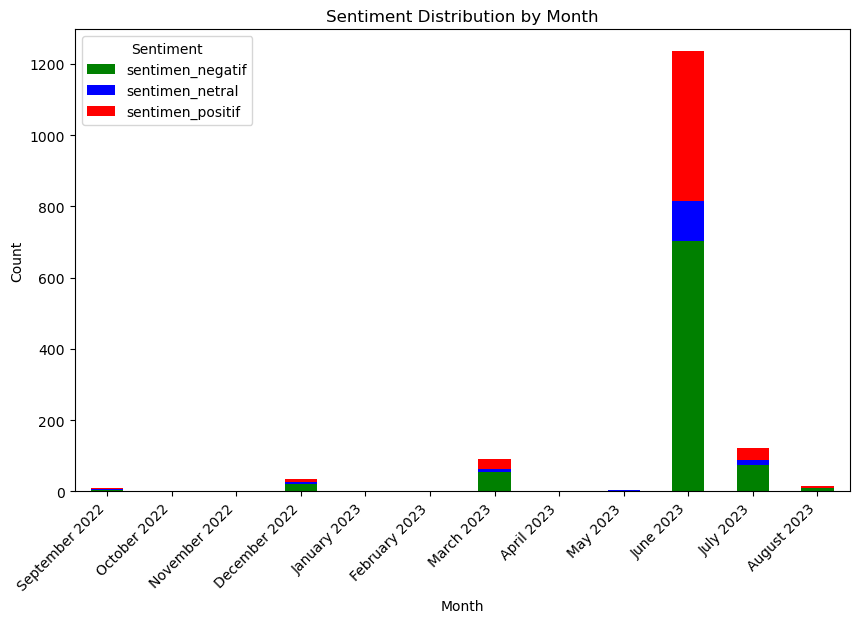

In [209]:
df_groupby_month.index = df_groupby_month.index.strftime('%B %Y')

df_groupby_month.plot(kind='bar', stacked=True, figsize=(10, 6), color=['green', 'blue', 'red'])

plt.title('Sentiment Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.xticks(rotation=45, ha='right')

plt.show()

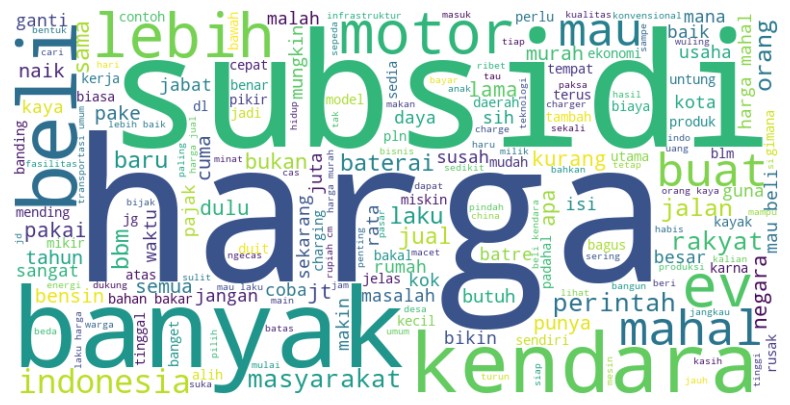

In [210]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_text = ' '.join(data['text_cleaning'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [211]:
from sklearn.feature_extraction.text import CountVectorizer

# Bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2), stop_words='english')
bigrams = bigram_vectorizer.fit_transform(df['text_cleaning'].dropna())
bigram_counts = bigrams.toarray().sum(axis=0)
bigram_vocab = bigram_vectorizer.get_feature_names_out()

# Top 10 Bigrams
top_bigrams = sorted(zip(bigram_vocab, bigram_counts), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Bigrams:")
for bigram, count in top_bigrams:
    print(f"{bigram}: {count}")

# Trigrams
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3), stop_words='english')
trigrams = trigram_vectorizer.fit_transform(df['text_cleaning'].dropna())
trigram_counts = trigrams.toarray().sum(axis=0)
trigram_vocab = trigram_vectorizer.get_feature_names_out()

# Top 10 Trigrams
top_trigrams = sorted(zip(trigram_vocab, trigram_counts), key=lambda x: x[1], reverse=True)[:10]
print("\nTop 10 Trigrams:")
for trigram, count in top_trigrams:
    print(f"{trigram}: {count}")


Top 10 Bigrams:
harga mahal: 58
mau beli: 46
bahan bakar: 45
rupiah cm: 32
orang kaya: 31
lebih baik: 27
transportasi umum: 27
beli kendara: 23
mau laku: 23
harga jual: 22

Top 10 Trigrams:
bahan bakar fosil: 10
kendara bahan bakar: 10
wuling air ev: 9
gimana mau laku: 8
harga bawah jt: 8
bahan bakar minyak: 5
gimana mau beli: 5
masyarakat tengah bawah: 5
siapa mau beli: 5
air ev harga: 4


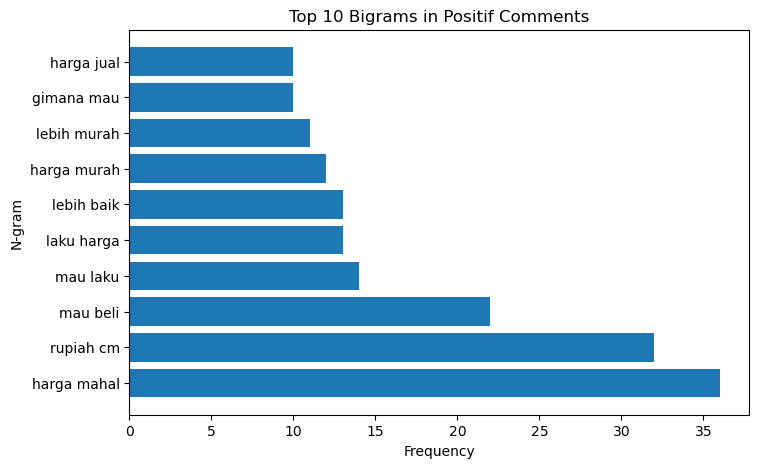

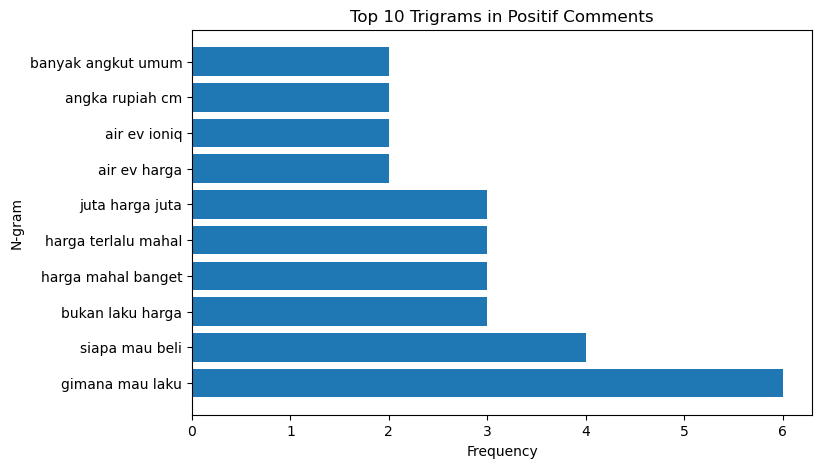

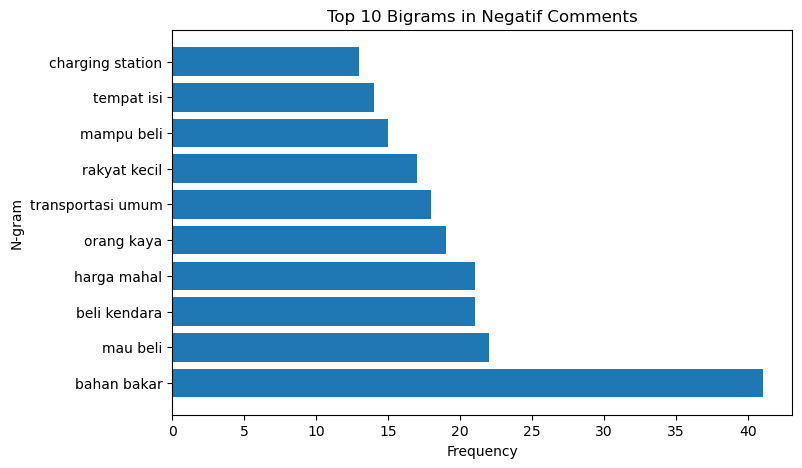

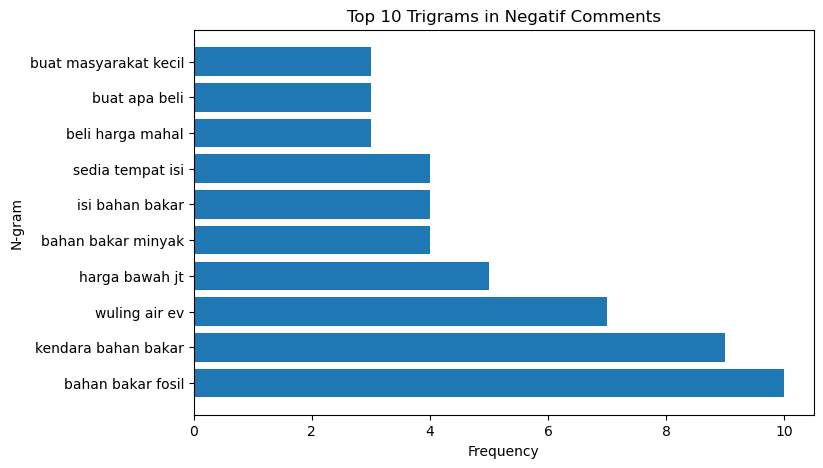

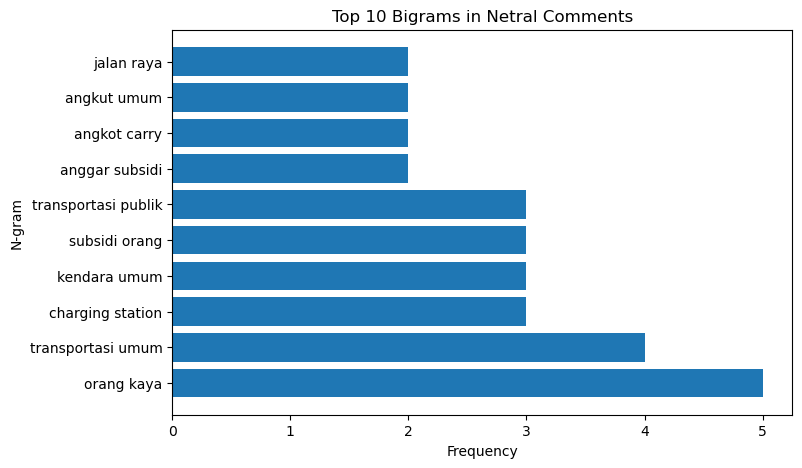

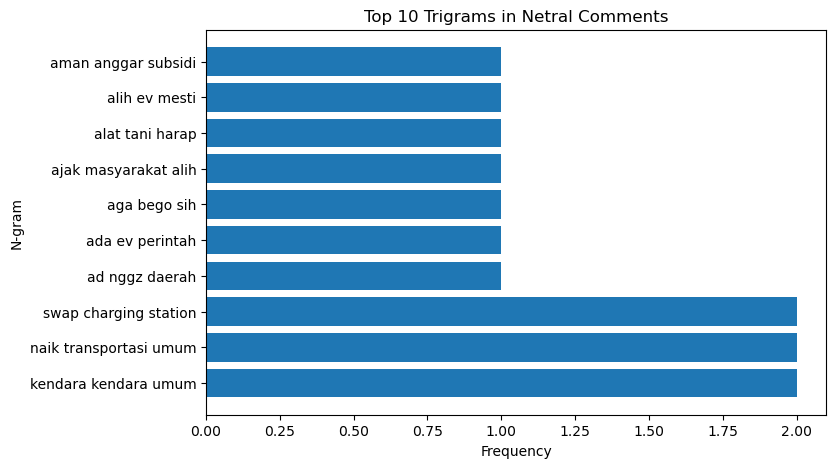

In [212]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

def plot_ngrams(sentiment, ngram_range, top_n=10):
    # Filter the dataframe for the specific sentiment
    text_data = df[df['sentimen'] == sentiment]['text_cleaning'].dropna()

    # Create a CountVectorizer for the specified n-gram range (bigrams or trigrams)
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngrams = vectorizer.fit_transform(text_data)

    # Sum the counts of each n-gram
    ngram_counts = ngrams.toarray().sum(axis=0)

    # Get the n-grams and their counts
    ngram_vocab = vectorizer.get_feature_names_out()

    # Sort and get the top n n-grams
    top_ngrams = sorted(zip(ngram_vocab, ngram_counts), key=lambda x: x[1], reverse=True)[:top_n]

    # Plot the top n-grams
    ngram_labels, ngram_values = zip(*top_ngrams)
    plt.figure(figsize=(8, 5))
    plt.barh(ngram_labels, ngram_values)
    plt.title(f"Top {top_n} {' '.join(['Bi', 'Tri'][ngram_range[1]-2:ngram_range[1]-1])}grams in {sentiment.capitalize()} Comments")
    plt.xlabel('Frequency')
    plt.ylabel('N-gram')
    plt.show()

# Bigram and Trigram Analysis for Positive Sentiment
plot_ngrams('positif', (2, 2), top_n=10)  # Bigrams
plot_ngrams('positif', (3, 3), top_n=10)  # Trigrams

# Bigram and Trigram Analysis for Negative Sentiment
plot_ngrams('negatif', (2, 2), top_n=10)  # Bigrams
plot_ngrams('negatif', (3, 3), top_n=10)  # Trigrams

# Bigram and Trigram Analysis for Neutral Sentiment
plot_ngrams('netral', (2, 2), top_n=10)   # Bigrams
plot_ngrams('netral', (3, 3), top_n=10)   # Trigrams


In [213]:
import numpy as np

# Identify outliers using the IQR method
Q1 = df['comment_length'].quantile(0.25)
Q3 = df['comment_length'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
outliers = df[(df['comment_length'] < (Q1 - 1.5 * IQR)) | (df['comment_length'] > (Q3 + 1.5 * IQR))]
max_length  = outliers['comment_length']
# Display outliers
print("Outliers in Comment Length:")
print(outliers[['text_cleaning', 'comment_length', 'sentimen']])


Outliers in Comment Length:
                                          text_cleaning  comment_length  \
6     mol keren yah   berita   plus padahal mol loka...           421.0   
9     adil rata terima subsidi jangan jangan pajak p...           358.0   
11    mungkin subsidi baik arah   seragam sekolah bi...           274.0   
18      buat hari   sih sangat guna     jalan jauh  ...           302.0   
21    apa sieh kok mbulet asli yo tiap spbu seluruh ...           231.0   
...                                                 ...             ...   
1461  subsidi   roda   jelas   tepat sasar uda   bel...           677.0   
1463  ttep   mahal nikmat main motor sendiri langsun...           251.0   
1471  mikir begini mbok kolaborasi usaha indonesia b...           268.0   
1498  coba lihat wuling ev jt indonesia harga jadi j...           268.0   
1506  program konversi motor baru libat bumn pasti m...           532.0   

     sentimen  
6     negatif  
9     negatif  
11    negatif  
18    n

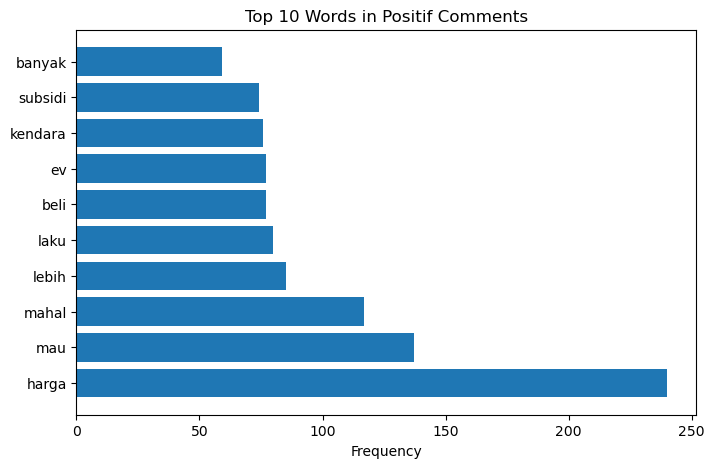

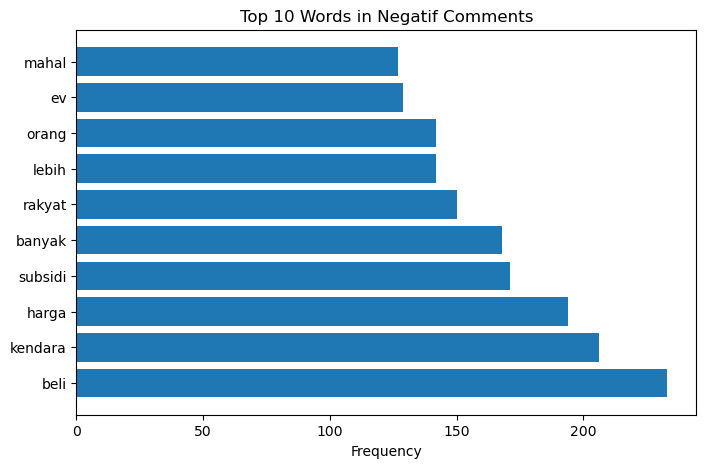

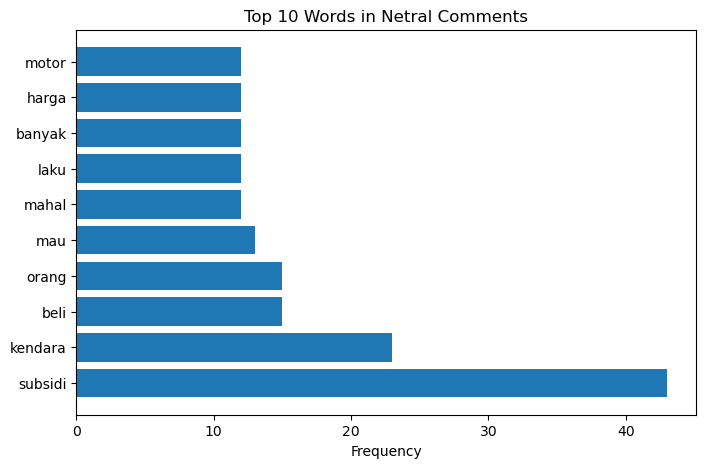

In [214]:
from collections import Counter
import matplotlib.pyplot as plt

def get_word_frequencies(sentiment):
    text = " ".join(df[df['sentimen'] == sentiment]['text_cleaning'].dropna())
    word_counts = Counter(text.split())
    return word_counts

positif_freq = get_word_frequencies('positif')
negatif_freq = get_word_frequencies('negatif')
netral_freq = get_word_frequencies('netral')

def plot_word_frequencies(word_freq, sentiment):
    top_words = dict(word_freq.most_common(10))
    plt.figure(figsize=(8, 5))
    plt.barh(list(top_words.keys()), list(top_words.values()))
    plt.title(f"Top 10 Words in {sentiment.capitalize()} Comments")
    plt.xlabel('Frequency')
    plt.show()

plot_word_frequencies(positif_freq, 'positif')
plot_word_frequencies(negatif_freq, 'negatif')
plot_word_frequencies(netral_freq, 'netral')

### Import Package

In [215]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from nltk import WordNetLemmatizer

from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

## NLP

In [216]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\untu0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\untu0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\untu0\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [217]:
data = data.reset_index()
data = data.drop(columns = 'tanggal')

In [218]:
le = LabelEncoder()
le.fit(['negatif','netral', 'positif'])
data['sentimen'] = le.transform(data['sentimen'])

In [219]:
stop_words = set(stopwords.words('indonesian'))
lemmatizer = WordNetLemmatizer()

In [220]:
def nlp(teks):
  teks  = word_tokenize(teks)
  teks = [kata.lower() for kata in teks]
  teks = [kata for kata in teks if kata.lower() not in stop_words]
  return teks

In [221]:
data['text_cleaning'] = data['text_cleaning'].apply(nlp)
data['text_cleaning']

0       [saran, sih, bikin, harga, ionic, kayak, brio,...
1       [problem, subsidi, kualitas, diturunin, harga,...
2       [kualitas, kembang, kualitas, motor, motor, pa...
3       [model, jelek, kwalitas, buruk, harga, mahal, ...
4       [syarat, ngaco, woy, anak, muda, blom, rumah, ...
                              ...                        
1510                               [kabar, negri, negara]
1511    [anak, sekolah, bantu, pasar, klw, klw, jebak,...
1512                               [esemka, bangga, solo]
1513    [cerdas, orang, hny, dn, pasar, jln, x, blom, ...
1514    [niat, beli, ev, murah, dinaikin, perintah, ra...
Name: text_cleaning, Length: 1515, dtype: object

##  Split

In [222]:
x = data['text_cleaning']
y = data['sentimen']

In [223]:
q70 = int(len(x)*.7)
q80 = int(len(x)*.8)

x_train, x_val, x_test = x[:q70], x[q70:q80], x[q80:]
y_train, y_val, y_test = y[:q70], y[q70:q80], y[q80:]

In [224]:
#Berfungsi untuk mendapakan vocab yang unik
vocabulary = set()
for text in x:
  vocabulary.update(text)

In [225]:
word_to_index = {word: index for index, word in enumerate(vocabulary)}

In [226]:
def convert_to_indices(tokens):
  return [word_to_index[token] for token in tokens]

x1 = x.apply(convert_to_indices).to_list()
x_train = x_train.apply(convert_to_indices).to_list()
x_val = x_val.apply(convert_to_indices).to_list()
x_test = x_test.apply(convert_to_indices).to_list()

In [227]:
x_train = pad_sequences(x_train)
x_val = pad_sequences(x_val)
x_test = pad_sequences(x_test)
x_train.shape, x_val.shape, x_test.shape

((1060, 227), (152, 74), (303, 86))

In [228]:
X_train, X_val, X_test = x[:q70], x[q70:q80], x[q80:]
X_train.shape, X_val.shape, X_test.shape

((1060,), (152,), (303,))

In [229]:
X_train[0]

['saran',
 'sih',
 'bikin',
 'harga',
 'ionic',
 'kayak',
 'brio',
 'insya',
 'alloh',
 'laris',
 'manis']

In [230]:
from sklearn.feature_extraction.text import TfidfVectorizer
vector = TfidfVectorizer()
X_train = vector.fit_transform(X_train)

AttributeError: 'list' object has no attribute 'lower'

In [134]:

pipeline  = Pipeline([
    ('scaler', MinMaxScaler()),
    ('RFC', RandomForestClassifier())
])

param_grid = {
    'RFC__n_estimators': [10, 50, 100, 150, 200],
    'RFC__max_depth': [None,5, 10, 20, 30]
}

grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Validation Score: {grid_search.best_score_}')


KeyboardInterrupt: 

In [88]:
test_predictions = grid_search.predict(X_test)
RFC_acc = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy Random Forest: {RFC_acc}')

Test Accuracy Random Forest: 0.570957095709571


In [89]:

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('NB', MultinomialNB())
])


param_grid = {
    'NB__alpha': [1e-3, 1e-2, 1e-1, 1, 10],
    'NB__fit_prior': [True, False]
}


grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Train Score: {grid_search.best_score_}')

val_predictions = grid_search.predict(X_val)

accuracy = accuracy_score(y_val, val_predictions)
print(f'Val Accuracy with GridSearchCV: {accuracy:.4f}')

Best Parameters: {'NB__alpha': 10, 'NB__fit_prior': True}
Best Train Score: 0.559433962264151
Val Accuracy with GridSearchCV: 0.6053


In [90]:
test_predictions = grid_search.predict(X_test)
nb_acc = accuracy_score(y_test, test_predictions)
print(f'Test Accuracy Naive Bayes: {nb_acc}')


Test Accuracy Naive Bayes: 0.5841584158415841


In [91]:
scaler = StandardScaler()

LR = LogisticRegression(max_iter=500, random_state=42)
pipeline = Pipeline([
    ('scaler', scaler),
    ('LR', LR)
])

param_grid = {
    'LR__solver': ['lbfgs', 'newton-cg', 'sag', 'saga']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Train Score: {grid_search.best_score_}')


c:\Users\untu0\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



KeyboardInterrupt: 

In [47]:

val_predictions = grid_search.predict(X_val)
print(f'Val Accuracy LR: {accuracy_score(y_val, val_predictions)}')
lr_acc = accuracy_score(y_test, test_predictions)
test_predictions = grid_search.predict(X_test)
print(f'Test Accuracy LR: {lr_acc}')

Val Accuracy LR: 0.6052631578947368
Test Accuracy LR: 0.5841584158415841


In [48]:
y_train = to_categorical(y_train, num_classes=3)
y_val = to_categorical(y_val, num_classes=3)
# y_test = to_categorical(y_test, num_classes=3)

In [71]:
model = Sequential([
    Embedding(input_dim=len(vocabulary), output_dim=64),
    GRU(9,kernel_regularizer=regularizers.l2(0.1)),
    Dropout(0.6),
    Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.1))
])
model.build(input_shape=(None, None))

In [72]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, None, 64)       │       233,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 9)              │         2,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,335 (919.28 KB)

 Trainable params: 235,335 (919.28 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    validation_data=(x_val, y_val))

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.4677 - loss: 5.0708 - val_accuracy: 0.5987 - val_loss: 4.0074
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.5807 - loss: 3.7333 - val_accuracy: 0.6053 - val_loss: 2.9992
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5861 - loss: 2.8329 - val_accuracy: 0.6053 - val_loss: 2.3181
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5873 - loss: 2.2136 - val_accuracy: 0.6053 - val_loss: 1.8574
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6140 - loss: 1.7816 - val_accuracy: 0.6184 - val_loss: 1.5453
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.6129 - loss: 1.5092 - val_accuracy: 0.6118 - val_loss: 1.3174
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6435 - loss: 1.3133 - val_accuracy: 0.6711 - val_loss: 1.1733
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.7120 - loss: 1.1420 - val_accuracy: 0.7237 - v

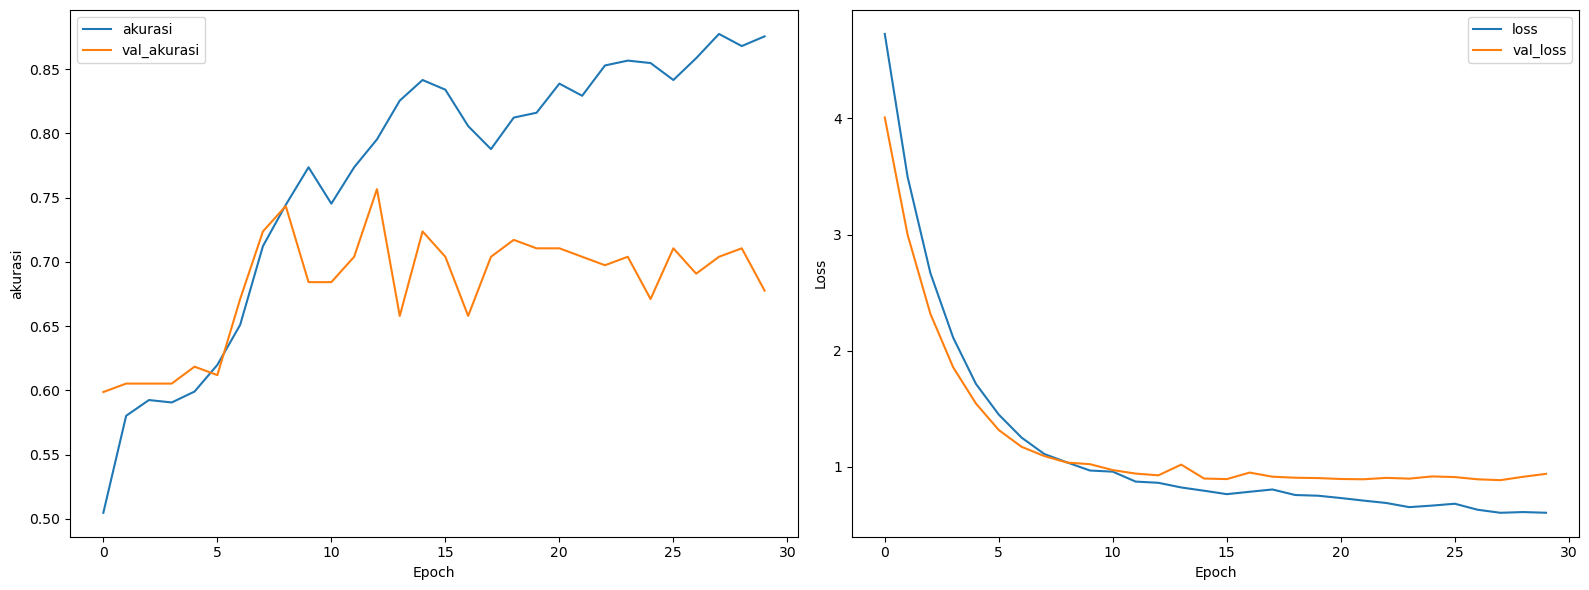

In [74]:
cek_1 = history

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)

plt.plot(cek_1.history['accuracy'], label='akurasi')
plt.plot(cek_1.history['val_accuracy'], label='val_akurasi')
plt.xlabel('Epoch')
plt.ylabel('akurasi')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cek_1.history['loss'], label='loss')
plt.plot(cek_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
              precision    recall  f1-score   support

           0       0.71      0.77      0.74       177
           1       0.00      0.00      0.00        30
           2       0.52      0.59      0.55        96

    accuracy                           0.64       303
   macro avg       0.41      0.46      0.43       303
weighted avg       0.58      0.64      0.61       303



c:\Users\untu0\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\untu0\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\untu0\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



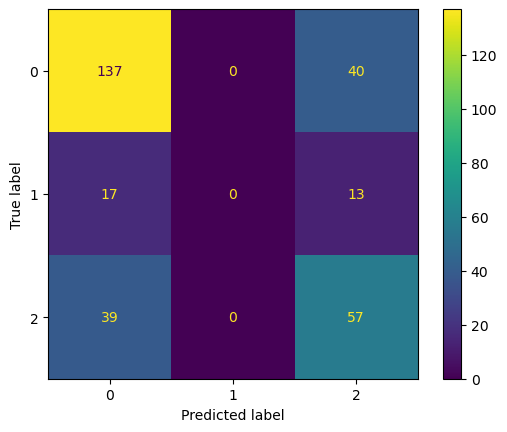

In [75]:
GRU_pred = model.predict(x_test)
GRU_pred_classes = np.argmax(GRU_pred, axis=1)
GRU_acc = accuracy_score(GRU_pred_classes, y_test)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
print(classification_report(y_test,  GRU_pred_classes))

cm = confusion_matrix(y_test, GRU_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [65]:
model = Sequential([
    Embedding(input_dim=len(vocabulary), output_dim=32),
    Dropout(0.5),
    LSTM(9, kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01))
])
model.build(input_shape=(None, None))

In [67]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, None, 32)       │       116,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, None, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 9)              │         1,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,182 (461.65 KB)

 Trainable params: 118,182 (461.65 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    validation_data=(x_val, y_val))

Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.4462 - loss: 1.4521 - val_accuracy: 0.6053 - val_loss: 1.3125
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5690 - loss: 1.2756 - val_accuracy: 0.6053 - val_loss: 1.1108
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.5462 - loss: 1.1635 - val_accuracy: 0.6053 - val_loss: 1.0247
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5494 - loss: 1.0765 - val_accuracy: 0.6053 - val_loss: 0.9752
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5762 - loss: 1.0245 - val_accuracy: 0.6053 - val_loss: 0.9440
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5794 - loss: 1.0013 - val_accuracy: 0.6053 - val_loss: 0.9254
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5715 - loss: 0.9732 - val_accuracy: 0.6053 - val_loss: 0.9118
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5382 - loss: 0.9790 - val_accuracy: 0.6053 - v

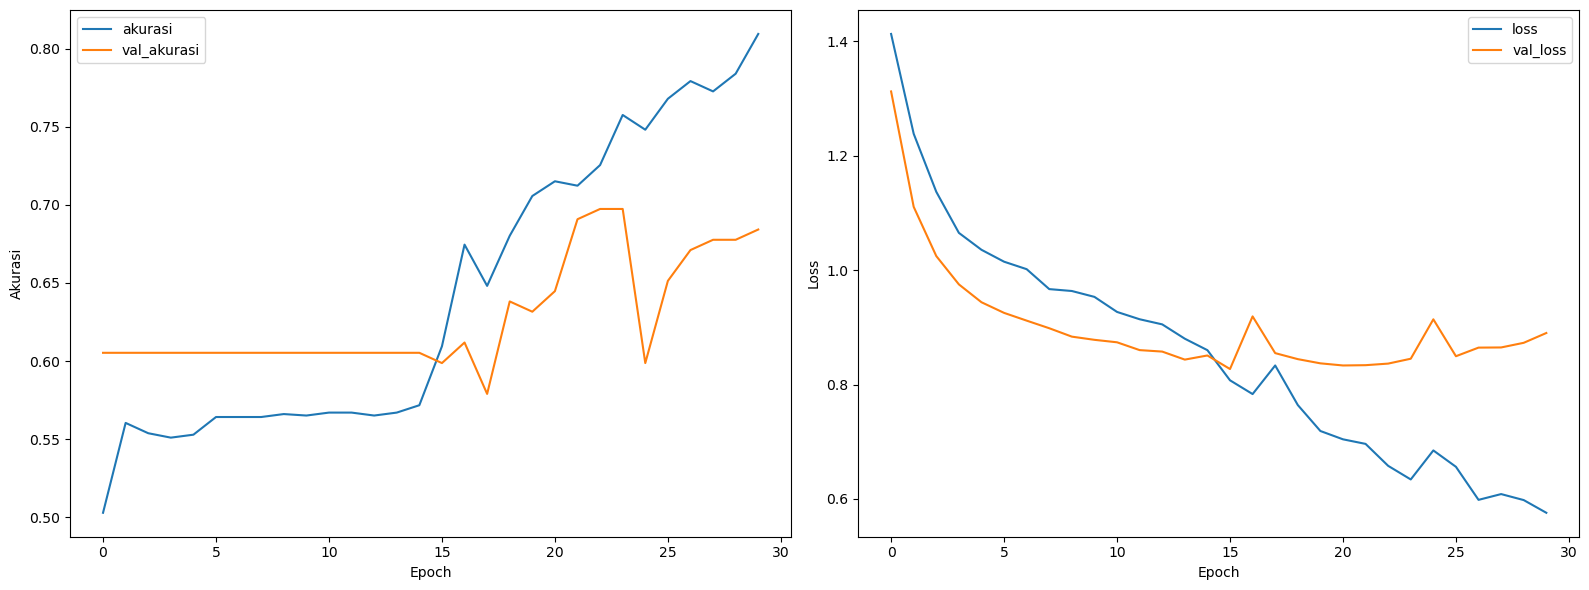

In [69]:
cek_1 = history

plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)

plt.plot(cek_1.history['accuracy'], label='akurasi')
plt.plot(cek_1.history['val_accuracy'], label='val_akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cek_1.history['loss'], label='loss')
plt.plot(cek_1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
              precision    recall  f1-score   support

           0       0.72      0.84      0.77       177
           1       0.00      0.00      0.00        30
           2       0.56      0.57      0.57        96

    accuracy                           0.67       303
   macro avg       0.43      0.47      0.45       303
weighted avg       0.60      0.67      0.63       303



c:\Users\untu0\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\untu0\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\untu0\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



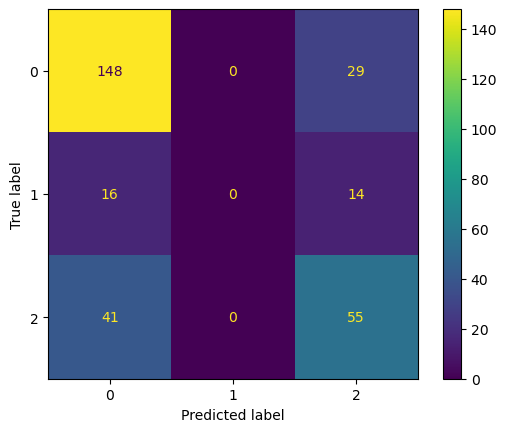

In [70]:
LSTM_pred = model.predict(x_test)
LSTM_pred_classes = np.argmax(LSTM_pred, axis=1)
LSTM_acc = accuracy_score(LSTM_pred_classes, y_test)
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
print(classification_report(y_test,  LSTM_pred_classes))

cm = confusion_matrix(y_test, LSTM_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [79]:
hasil = pd.DataFrame({
    "Algoritma" : ["Random Forest Classifier", "Multinomial Naive Bayes", "Logistic Regression", "GRU", "LSTM"],
    "Akurasi" : [RFC_acc,nb_acc,lr_acc,GRU_acc,LSTM_acc]})
hasil

,Algoritma,Akurasi
0,Random Forest Classifier,0.564356
1,Multinomial Naive Bayes,0.584158
2,Logistic Regression,0.584158
3,GRU,0.640264
4,LSTM,0.669967
